In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

In [3]:
# df = pd.read_csv(r'C:\Users\YBI Foundation\Desktop\Servo Mechanism.csv')

In [4]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.7+ KB


In [6]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [7]:
df.shape

(167, 5)

In [8]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [9]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [10]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

In [11]:
df.replace({ 'Motor': {'A': 0, 'B':1, 'C':2, 'D': 3, 'E' :4}}, inplace=True)
df.replace({'Screw': {'A': 0, 'B':1, 'C':2, 'D': 3, 'E' :4}}, inplace=True)

In [15]:
y = df['Class']


In [16]:
y.shape

(167,)

In [17]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [19]:
X=df[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [23]:
X = df.drop('Class', axis=1)

In [24]:
X.shape

(167, 4)

In [25]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


In [26]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=2529)

In [30]:
X_train.shape, X_test. shape, y_train. shape, y_test.shape

((116, 4), (51, 4), (116,), (51,))

In [32]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(X_test)

In [40]:
y_pred.shape

(51,)

In [41]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
mean_squared_error(y_test,y_pred)

66.03589175595566

In [44]:
mean_absolute_error(y_test, y_pred)

7.190539677251239

In [45]:
r2_score (y_test, y_pred)

0.6807245170563926

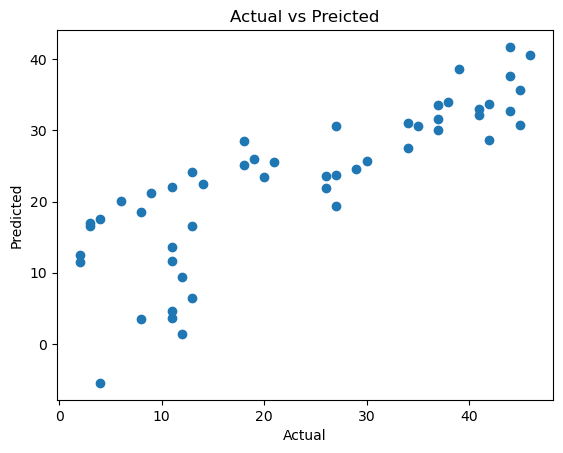

In [46]:
import matplotlib.pyplot as plt
plt.scatter (y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

In [48]:
X_new = df.sample(1)

In [49]:
X_new

,Motor,Screw,Pgain,Vgain,Class
74,0,2,4,1,6


In [50]:
X_new.shape

(1, 5)

In [51]:
X_new = X_new.drop('Class', axis=1)

In [52]:
X_new

,Motor,Screw,Pgain,Vgain
74,0,2,4,1


In [53]:
X_new.shape

(1, 4)

In [56]:
y_pred_new = lr.predict(X_new)

In [57]:
y_pred_new

array([19.5361705])